# 案例：基于NLP和情感分析的交易策略

<div class="alert alert-block alert-success">
随着非结构化数据量的增加，基于文本数据的交易策略变得越来越受欢迎。在这个案例研究中，我们将探讨如何使用基于 NLP 的情感来构建交易策略。
</div>










自然语言处理（NLP）提供了量化文本的能力。人们可以开始提出这样的问题：这条新闻有多积极或多消极？我们如何量化词语？或许，NLP 最显著的应用是其在算法交易中的使用。NLP 提供了一种有效的手段来监控市场情绪。通过将基于 NLP 的情感分析技术应用于新闻文章、报告、社交媒体或其他网络内容，可以有效地确定这些来源是否具有正面或负面的情感评分。情感评分可以作为买入具有正面评分的股票和卖出具有负面评分的股票的方向性信号。



## 1. 问题描述

利用基于NLP的情感分析构建交易策略是一种结合了文本分析和量化金融技术的方法，能够从市场参与者的情感中挖掘出对市场走势的有用信息，并据此制定交易决策。以下是探讨如何利用基于NLP的情感来构建交易策略的流程：

1. **情感数据收集**：首先，需要收集包含市场参与者情感的数据，这些数据可以来自于各种来源，例如金融新闻、社交媒体（如Twitter、StockTwits）、公司报告、分析师评论等。这些文本数据通常包含对于特定资产或市场的观点、情绪和预测。

2. **情感分析**：利用NLP技术对收集到的文本数据进行情感分析。情感分析可以帮助识别文本中的情感倾向，通常分为正面、负面和中性情绪。在金融领域，特别是在交易策略构建中，关注的主要是与市场走势相关的情感。

3. **交易策略制定**：根据情感指标与市场走势之间的关联关系，制定相应的交易策略。例如，可以基于情感指标的变化来进行买入或卖出决策，或者将情感指标作为其他技术分析指标的辅助。

4. **回测与优化**：在历史数据上进行回测，评估和优化构建的交易策略。通过回测可以评估策略的盈亏情况，从而进行必要的调整和优化。



## 2. 加载数据

这里我们收集苹果股票（代码：AAPL）的股票价格，以及雅虎财经给出的相关财经文本，并将其按照对应日期合并到一个表格中。

使用pandas读取该表格，

In [1]:
import pandas as pd
data_df = pd.read_csv('datasets/AAPL_NewsAndReturnData.csv')
data_df.head()

,ticker,headline,date,eventRet,Close
0,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.032870,10.025860
1,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.002913,10.037944
2,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,0.001156,9.521007
3,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.029160,10.785560
4,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.010667,10.810323


## 3. 情感分析
使用TextBlob库对预处理后的文本进行情感分析，计算出来的情感极性是一个介于-1（非常负面）和+1（非常正面）之间的数值。

In [27]:
data_df['sentiment_textblob'] = [TextBlob(s).sentiment.polarity for s in data_df['headline'].astype(str)] 

让我们分析情感分数与回报率的散点图。

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

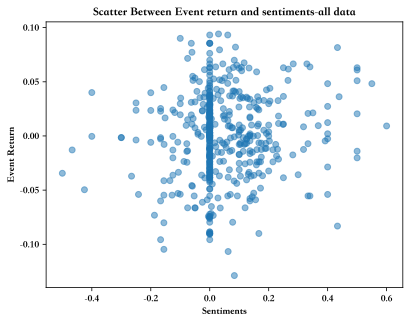

In [28]:
plt.scatter(data_df['sentiment_textblob'],data_df['eventRet'], alpha=0.5)
plt.title('Scatter Between Event return and sentiments-all data')
plt.ylabel('Event Return')
plt.xlabel('Sentiments')
plt.show()

总体来看，从结果中我们可以看到新闻收益和情感之间没有很强的相关性。此外，很多情感分数集中在0附近。

## 4. 特征工程
将情感得分和其他相关特征（如股票价格、交易量等）组合成特征向量，以便输入到交易模型中。

In [29]:
data_df

,ticker,headline,date,eventRet,Close,sentiment_textblob,signal
date,,,,,,,
2011-06-07,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.032870,10.025860,0.020000,0
2011-06-14,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.002913,10.037944,0.000000,0
2011-06-20,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,0.001156,9.521007,-0.000794,0
2011-07-07,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.029160,10.785560,-0.022222,0
2011-07-13,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.010667,10.810323,0.248611,1
...,...,...,...,...,...,...,...
2018-12-13,AAPL,Piper Jaffray cuts its Apple (NASDAQ:AAPL) pri...,2018-12-13,-0.018270,40.912155,0.000000,0
2018-12-13,AAPL,A U.S. tribunal will review a ruling that said...,2018-12-13,-0.018270,40.912155,0.000000,0
2018-12-14,AAPL,D.A. Davidson maintains a Buy rating on Apple ...,2018-12-14,-0.030364,39.603062,0.000000,0


## 5. 构建交易策略
根据情感得分生成交易信号。例如，当情感得分高于某个阈值时，生成买入信号；当情感得分低于某个阈值时，生成卖出信号。

In [30]:
def generate_trading_signals(data):
    buy_signals = data['sentiment_textblob'] > 0.2
    sell_signals = data['sentiment_textblob'] < -0.2
    data['signal'] = 0
    data.loc[buy_signals, 'signal'] = 1
    data.loc[sell_signals, 'signal'] = -1
    return data

signals = generate_trading_signals(data_df)
signals.index = pd.to_datetime(signals['date'])
signals['Close'] = signals['Close'].astype(float)
signals.head()

,ticker,headline,date,eventRet,Close,sentiment_textblob,signal
date,,,,,,,
2011-06-07,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.032870,10.025860,0.020000,0
2011-06-14,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.002913,10.037944,0.000000,0
2011-06-20,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,0.001156,9.521007,-0.000794,0
2011-07-07,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.029160,10.785560,-0.022222,0
2011-07-13,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.010667,10.810323,0.248611,1


## 6. 回测策略
使用历史数据对交易策略进行回测，以评估其性能。首先计算根据交易信号，生成的事件收益率，再计算累积收益率。

In [31]:
ret = (signals['eventRet'] * signals['signal'])
cum_ret = ret.cumsum()

Text(0.5, 1.0, '交易信号')

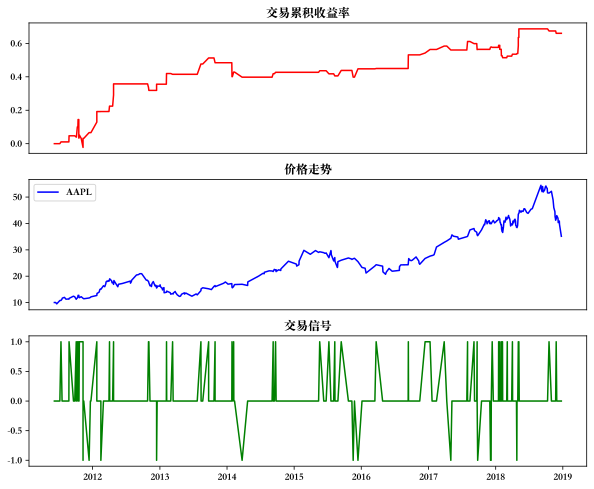

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
# 子图1
ax[0].plot(cum_ret, color='red')
ax[0].set_xticks([])
ax[0].set_title('交易累积收益率')
# 子图2
ax[1].plot(signals['Close'], color='blue', label='AAPL')
ax[1].set_xticks([])
ax[1].set_title('价格走势')
ax[1].legend()
# 子图3
ax[2].plot(signals['signal'], color='green')
ax[2].set_title('交易信号')

## 总结
上述步骤提供了一个实现基于NLP和情感分析的交易策略的全面指南。需要注意的是，情感分析可能存在误差和不确定性，而且市场行为受多种因素影响，因此在实际应用中需要谨慎评估和管理风险。